# **NÃO ESQUEÇAM DE ADICIONAR OS ARQUIVOS NO AMBIENTE NA HORA DE RODAR**
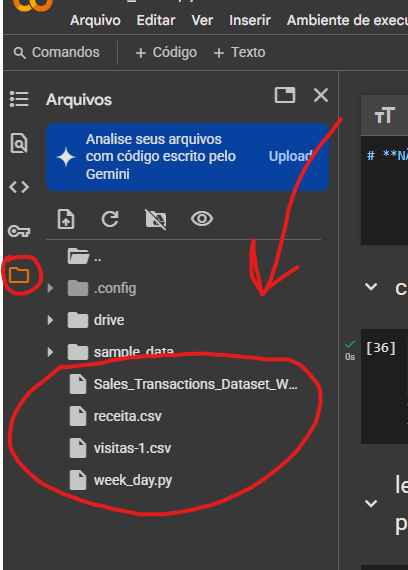

## chamo as bibliotecas que preciso

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from week_day import transform_to_date
from natsort import natsorted
import numpy as np

## leio o arquivo base necessário, transformo em dataframe e imprimo as informações da coluna para saber quantas colunas W existem

In [ ]:
df_wide = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
df_wide = pd.DataFrame(df_wide)

display(df_wide)
df_wide.info(verbose=True)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 107 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Product_Code   object 
 1    W0             int64  
 2    W1             int64  
 3    W2             int64  
 4    W3             int64  
 5    W4             int64  
 6    W5             int64  
 7    W6             int64  
 8    W7             int64  
 9    W8             int64  
 10   W9             int64  
 11   W10            int64  
 12   W11            int64  
 13   W12            int64  
 14   W13            int64  
 15   W14            int64  
 16   W15            int64  
 17   W16            int64  
 18   W17            int64  
 19   W18            int64  
 20   W19            int64  
 21   W20            int64  
 22   W21            int64  
 23   W22            int64  
 24   W23            int64  
 25   W24            int64  
 26   W25            int64  
 27   W26            int64  
 28   W27            int

## Resolução 1: uso a função do pandas melt para "despivotar" as colunas e transformá-las em linhas, crio uma nova coluna com seus respectivos valores e uso a função natsorted da natsort para ordenar pelos códigos do produto (pois a ordenação padrão de sort by ordenaria 1, 11, 100, 2, 22, 200, etc.)

In [ ]:
# resolução 1

df_long_not_ready = pd.melt(
    df_wide,
    id_vars = ['Product_Code'],
    value_vars = [f'W{i}' for i in range(52)],
    var_name = 'Week',
    value_name = 'Transaction_Value'
)

sorted_codes = natsorted(df_long_not_ready['Product_Code'].unique())
df_long = df_long_not_ready.set_index('Product_Code').loc[sorted_codes].reset_index()

display(df_long)

,Product_Code,Week,Transaction_Value
0,P1,W0,11
1,P1,W1,12
2,P1,W2,10
3,P1,W3,8
4,P1,W4,13
...,...,...,...
42167,P819,W47,0
42168,P819,W48,0
42169,P819,W49,0
42170,P819,W50,0


## Resolução 2: apenas aplico a função de acordo com o enunciado

In [ ]:
# resolução 2

df_long['Date'] = df_long['Week'].apply(transform_to_date)

display(df_long)

,Product_Code,Week,Transaction_Value,Date
0,P1,W0,11,2022-01-01
1,P1,W1,12,2022-01-08
2,P1,W2,10,2022-01-15
3,P1,W3,8,2022-01-22
4,P1,W4,13,2022-01-29
...,...,...,...,...
42167,P819,W47,0,2022-11-26
42168,P819,W48,0,2022-12-03
42169,P819,W49,0,2022-12-10
42170,P819,W50,0,2022-12-17


## Resolução 3: seleciono 3 produtos de forma aleatória utilizando a função sample e aplicando unique para remover as duplicadas e evitar que seja selecionado o mesmo valor mais de uma vez

In [ ]:
# resolução 3

selected_products = df_long['Product_Code'].sample(3).unique()
df_selected = df_long[df_long['Product_Code'].isin(selected_products)]

display(df_selected)


,Product_Code,Week,Transaction_Value,Date
10088,P195,W0,4,2022-01-01
10089,P195,W1,4,2022-01-08
10090,P195,W2,7,2022-01-15
10091,P195,W3,5,2022-01-22
10092,P195,W4,5,2022-01-29
...,...,...,...,...
17779,P342,W47,1,2022-11-26
17780,P342,W48,2,2022-12-03
17781,P342,W49,2,2022-12-10
17782,P342,W50,5,2022-12-17


## Resolução 4: _[fazer o gráfico]_

In [ ]:
# resolução 4: colocar aqui o gráfico

## Resolução 5: aplico .copy para garantir a independência de df_selected (pois o pandas não sabe se df_selected é uma cópia ou uma referência a df_long) e calculo a diferença aplicando .diff(). Logo após, crio uma condição para substituir os valores NaN aplicando isna e any para que a condição dentro do if seja aplicada se houver pelo menos um valor true em isna.

In [ ]:
# resolução 5

df_selected = df_selected.copy()
df_selected['Diff'] = df_selected.groupby('Product_Code')['Transaction_Value'].diff()

if df_selected['Diff'].isna().any():
    df_selected.loc[df_selected['Diff'].isna(), 'Diff'] = 0

display(df_selected)

,Product_Code,Week,Transaction_Value,Date,Diff
10088,P195,W0,4,2022-01-01,0.0
10089,P195,W1,4,2022-01-08,0.0
10090,P195,W2,7,2022-01-15,3.0
10091,P195,W3,5,2022-01-22,-2.0
10092,P195,W4,5,2022-01-29,0.0
...,...,...,...,...,...
17779,P342,W47,1,2022-11-26,-2.0
17780,P342,W48,2,2022-12-03,1.0
17781,P342,W49,2,2022-12-10,0.0
17782,P342,W50,5,2022-12-17,3.0


### gráfico resolução 5: _[fazer o gráfico]_

In [ ]:
# colocar aqui o gráfico

## Resolução 6: aplico funções de agregação agg para calcular média (mean), mediada (median), desvio padrão (std), valor mínimo (min) e valor máximo (max)

In [ ]:
# resolução 6

stats = df_selected.groupby('Product_Code')['Transaction_Value'].agg(['mean', 'median', 'std', 'min', 'max'])

display(stats)


,mean,std,min,median,max
Product_Code,,,,,
P195,4.346154,2.391854,0,4.0,12
P249,0.076923,0.269069,0,0.0,1
P342,2.307692,1.435386,0,2.0,6


## Resolução 7: _[fazer o gráfico]_

# **Aqui seguindo FABIANO ...Estou a disposição.    2ª Análise: Receita por Visitas **

 1. Junção de dados

In [ ]:
# Carregamento dos dados
visitas = pd.read_csv('visitas-1.csv')
receita = pd.read_csv('receita.csv')

# Junção dos DataFrames pela coluna 'id_visita'
df = pd.merge(visitas, receita, on='id_visita', how='left')

# Preenchendo valores ausentes de receita com 0
df['receita'] = df['receita'].fillna(0)


2.  Estatísticas por cliente ||| Calcula 3 coisas para cada cliente:

Média da receita considerando todas as visitas.
Média considerando só visitas que geraram receita.
Percentual de visitas com receita maior que 0.

In [ ]:
# Agrupamento por cliente
agrupado = df.groupby('id_cliente')

# Estatísticas por cliente
estatisticas = agrupado.agg(
    media_todas_visitas=('receita', 'mean'),
    media_so_com_receita=('receita', lambda x: x[x > 0].mean()),
    percentual_visitas_com_receita=('receita', lambda x: (x > 0).mean())
).reset_index()

print(estatisticas.head())


   id_cliente  media_todas_visitas  media_so_com_receita  \
0        1111            52.174383            613.049000   
1        1112            82.266157            753.558000   
2        1113           107.288046            800.062286   
3        1114            67.600250            676.002500   
4        1115           110.904764           1083.454231   

   percentual_visitas_com_receita  
0                        0.085106  
1                        0.109170  
2                        0.134100  
3                        0.100000  
4                        0.102362  


3. Simulação de Amostragem Bootstrap  || Faz 1000 amostragens com reposição.
Em cada amostra, calcula a média da coluna receita.

In [ ]:

medias = []
ids_simulacao = []

# Tamanho da amostra
tamanho = len(df)

# Loop de 1000 simulações
for i in range(1000):
    amostra = df.sample(n=tamanho, replace=True)
    media = amostra['receita'].mean()
    medias.append(media)
    ids_simulacao.append(i)

# DataFrame com resultados da simulação
simulacoes = pd.DataFrame({
    'id_simulacao': ids_simulacao,
    'media_amostrada': medias
})


4. Visualização da Distribuição

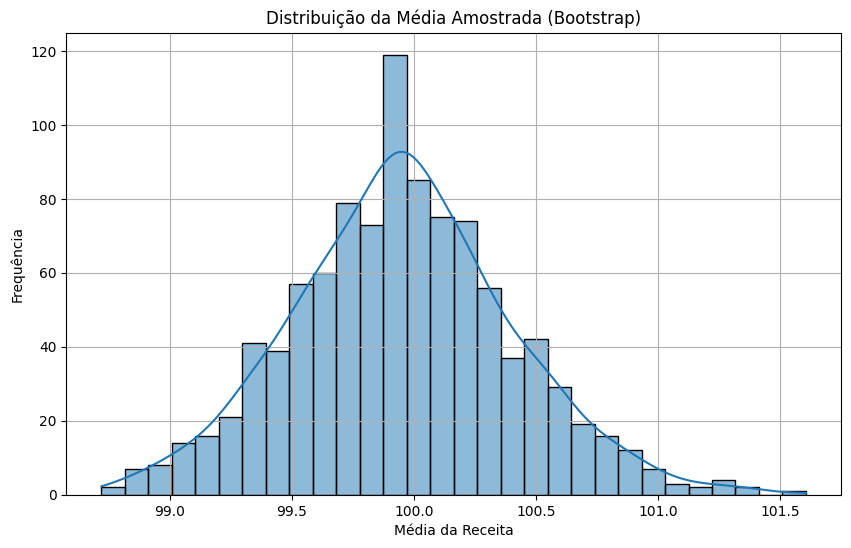

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(simulacoes['media_amostrada'], kde=True, bins=30)
plt.title('Distribuição da Média Amostrada (Bootstrap)')
plt.xlabel('Média da Receita')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Como adicional >>> 1 gráfico: Gráfico com Plotly

In [ ]:
import plotly.express as px

fig = px.histogram(
    simulacoes,
    x='media_amostrada',
    nbins=30,
    title='Distribuição Interativa da Média Amostrada (Bootstrap)',
    labels={'media_amostrada': 'Média da Receita'},
    opacity=0.75
)

fig.update_layout(
    bargap=0.1,
    xaxis_title='Média da Receita',
    yaxis_title='Frequência',
    template='plotly_white'
)

fig.show()
